In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v

Sebastian Raschka 
last updated: 2016-06-01 

CPython 3.5.1
IPython 4.2.0


# Fibonacci Numbers

A Fibonacci number F(n) is computed as the sum of the two numbers preceeding it in a Fibonacci sequence

(0), 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ...,

for example, F(10) = 55.

More formally, we can define a Fibonacci number F(n) as 

$F(n) = F(n-1) + F(n-2)$, for integers $n > 1$:

$$F(n)=
\begin{cases} 
      0 & n=0, \\
      1, & n=1, \\
      F(n-1) + F(n-2), & n > 1.
   \end{cases}$$

The Fibonacci sequence was named after Leanardo Fibonacci, who used the Fibonacci sequence to study rabit populations in the 12th century. I highly recommend reading the excellent articles on [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_number) and [Wolfram](http://mathworld.wolfram.com/FibonacciNumber.html), which discuss the interesting facts about the Fibonacci number in great detail.

The recursive Fibonacci number computation is a typical text book example of a recursive algorithm:

In [1]:
def fibo_recurse(n):
    if n <= 1:
        return n
    else:
        return fibo_recurse(n-1) + fibo_recurse(n-2)
    
print(fibo_recurse(0))
print(fibo_recurse(1))
print(fibo_recurse(10))

0
1
55


However, it is unfortunately a terribly inefficient algorithm with an exponential running time of $O(2^n)$. The main problem why it is so slow is that we recompute Fibonacci number $F(n) = F(n-1) + F(n-2)$ repeatedly as shown in the recursive tree below:



![Fibonacci Number Recursive Tree](../../images/efficiency/fibonacci_tree.png)

For example, assuming $n \geq 2$ we have 

$O(2^{n-1}) + O(2^{n-2}) + O(1) = O(2^n)$

for $F(n) = F(n-1) + F(n-2)$, where $O(1)$ is for adding to Fibonacci numbers together.



A more efficient approach to compute a Fibonacci number is a dynamic approach with linear runtime, $O(n)$:

In [35]:
def fibo_dynamic(n):
    f, f_minus_1 = 0, 1
    for i in range(n):
        f_minus_1, f = f, f + f_minus_1
    return f

print(fibo_dynamic(0))
print(fibo_dynamic(1))
print(fibo_dynamic(10))

0
1
55


(If you are interested in other approaches, I recommend you take a look at the pages on [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_number) and [Wolfram](http://mathworld.wolfram.com/FibonacciNumber.html).)

To get a rough idea of the running times of each of our implementations, let's use the `%timeit` magic for F(30).

In [34]:
%timeit -r 3 -n 10 fibo_recurse(n=30) 

10 loops, best of 3: 499 ms per loop


In [36]:
%timeit -r 3 -n 10 fibo_dynamic(n=30) 

10 loops, best of 3: 4.05 µs per loop


Finally, let's benchmark our implementations for varying sizes of n:

In [45]:
import timeit

funcs = ['fibo_recurse', 'fibo_dynamic']
orders_n = list(range(0, 50, 10))
times_n = {f:[] for f in funcs}

for n in orders_n:
    for f in funcs:
        times_n[f].append(min(timeit.Timer('%s(n)' % f, 
                'from __main__ import %s, n' % f)
                    .repeat(repeat=3, number=5)))

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_timing():

    labels = [('fibo_recurse', 'fibo_recurse'), 
              ('fibo_dynamic', 'fibo_dynamic')]

    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(10, 8))
    for lb in labels:
        plt.plot(orders_n, times_n[lb[0]], 
             alpha=0.5, label=lb[1], marker='o', lw=3)
    plt.xlabel('sample size n')
    plt.ylabel('time per computation in milliseconds [ms]')
    plt.legend(loc=2)
    plt.ylim([-1, 300])
    plt.grid()
    plt.show()

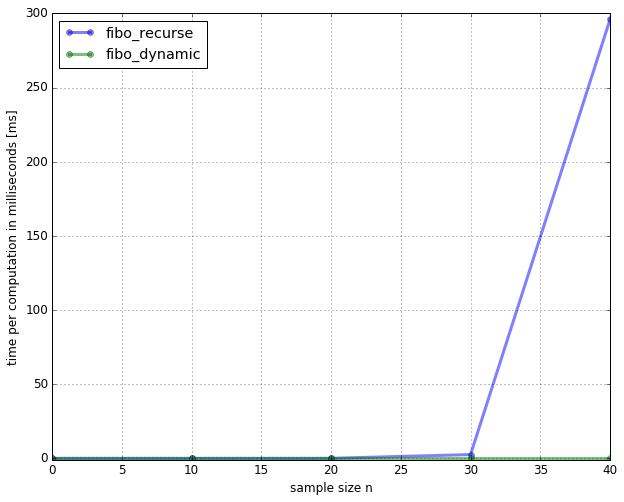

In [51]:
plot_timing()